# Programming Assignment 1

### EC184604 - Computer Vision
### Deadline: 23 September 2021

<div style="font-weight:bold;font-family:courier;font-size:12pt">
Name : Meril Lia Priday Riskiana<br/>
NRP &nbsp;: 07211940000022</div>

### [15pt] Gaussian Filtering (a.k.a Blurring Effect)
In this section, you required to implement the blurring effect that we discussed in the class. You must use the Gaussian filter instead of standard blur filter. Please provide your own image. You can use numpy-scipy only implementation or opencv library implementation (preferred) for this assignment. You also need to display the image before and after the Gaussian filter is applied. As summary, if you want to get maximum score you must:
- Use Gaussian filter
- Display image before and after the Gaussian filtering proceess
- Try several different Sigma value on Gaussian filter parameter

Reference: 
- [OpenCV implementation] https://docs.opencv.org/3.4.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- [Numpy-Scipy implementation] http://scipy-lectures.org/advanced/image_processing/#blurring-smoothing

Text(0.5, 1.0, 'original')

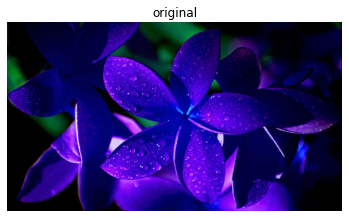

In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# please provide your code here

img1 = cv.imread('kamboja.jpg')
plt.imshow(img1)
plt.axis('off')
plt.title("original")


Text(0.5, 1.0, 'percobaan 1')

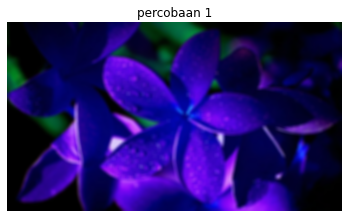

In [51]:
#gaussian blur

blur = cv.GaussianBlur(img1,(11,11),cv.BORDER_DEFAULT)
plt.imshow(blur)
plt.axis('off')
plt.title("percobaan 1")

Text(0.5, 1.0, 'percobaan 2')

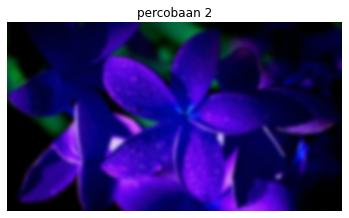

In [52]:
blur = cv.GaussianBlur(img1,(101,101),cv.BORDER_DEFAULT)
plt.imshow(blur)
plt.axis('off')
plt.title("percobaan 2")

Text(0.5, 1.0, 'percobaan 3')

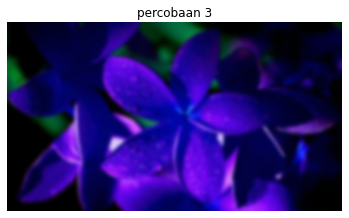

In [53]:
blur = cv.GaussianBlur(img1,(999,999),cv.BORDER_DEFAULT)
plt.imshow(blur)
plt.axis('off')
plt.title("percobaan 3")

### [15pt] Pyramid Image Generation

In this assignment you need to implementing the pyramid image generation process, as we discussed in the class. Same as previous assignment, you can use either the scipy-numpy implementation or OpenCV implementation. If you want to get maximum score, you must
- Use color image instead of grayscale
- Show the original image
- Show the pyramid image 
- Try several different pyramid level

Reference:
- [OpenCV-Pyramid Image] https://docs.opencv.org/3.4.0/d4/d1f/tutorial_pyramids.html
- [Scipy-Numpy Pyramid Image] !No reference

In [139]:
# please provide your code here
# belum selesai

from skimage import data
from skimage.transform import pyramid_gaussian


img4 = cv.imread('baby.jpg')
rows, cols, dim = img4.shape
pyramid = tuple(pyramid_gaussian(img4, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()


ValueError: could not broadcast input array from shape (2,3,3) into shape (1,3,3)

### [35pt] Edge Detection

In this assignment, you need to implement several edge detection algorithm, including sobel edge detection, laplace edge detection, and canny edge detection. For this assignment, OpenCV provide more complete function for edge detection. If you want to get maximum score, you must:
- Implementing Canny Edge Detection
- Implementing Sobel Edge Detection
- Implementing Laplace Edge Detection
- Show the original image
- Show the image after edge detection process

Reference:
- [OpenCV-Canny Edge Detection] https://docs.opencv.org/4.0.1/dd/d1a/group__imgproc__feature.html
- [OpenCV-Laplace Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6
- [OpenCV-Sobel Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
- [Scipy-Numpy Sobel Edge Detection] http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_find_edges.html

Text(0.5, 1.0, 'original')

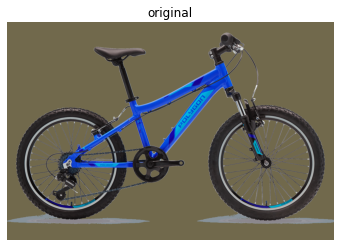

In [77]:
# please provide your code here

img3 = cv.imread('sepeda.png')
plt.imshow(img3)
plt.axis('off')
plt.title("original")

(-0.5, 1919.5, 1279.5, -0.5)

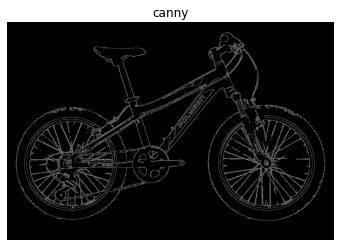

In [80]:
# canny edge detection

canny = cv.Canny(img3, 100, 500)

plt.imshow(canny, cmap='gray')
plt.title("canny")
plt.axis('off')


(-0.5, 1919.5, 1279.5, -0.5)

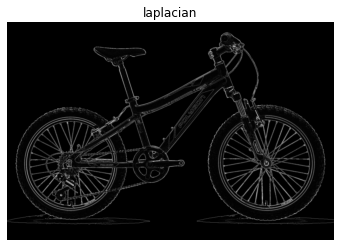

In [83]:
# laplacian edge detection

img3 = cv.imread('sepeda.png', cv.IMREAD_COLOR)
# remove noise
img3_gray = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
# Reduce noise 
img = cv.GaussianBlur(img3_gray,(3,3),0)
# edge detection
laplac = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
laplac = cv.convertScaleAbs(laplac)
# Plot outputs
plt.title('laplacian')
plt.imshow(laplac, cmap='gray')
plt.axis('off')


Text(0.5, 1.0, 'sobel x')

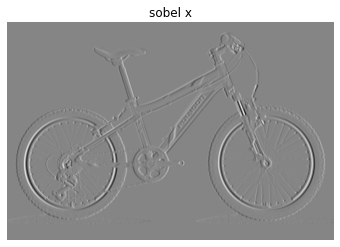

In [123]:
# sobel x, y, z edge detection

img3 = cv.imread('sepeda.png')
img_gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray, (3,3), 0)

sobelx = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=31) # Sobel Edge Detection on the X axis

plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.title("sobel x")

Text(0.5, 1.0, 'sobel y')

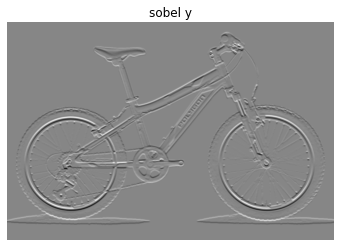

In [122]:
sobely = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=31) # Sobel Edge Detection on the Y axis
plt.imshow(sobely, cmap ='gray')
plt.axis('off')
plt.title("sobel y")

Text(0.5, 1.0, 'sobel xy')

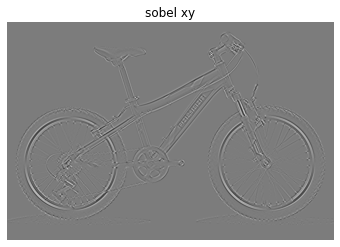

In [121]:
sobelxy = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=1, ksize=31) # Combined X and Y Sobel Edge Detection
plt.imshow(sobelxy, cmap ='gray')
plt.axis('off')
plt.title("sobel xy")

### [35pt] Corner Detection

In this assignment, you need to implement corner detection algorithm, including Harris corner detection and Shi-Thomas corner detection. If you want to get maximum score, you must:
- Implementing Harris corner detection algorithm
- Implementing Shi-Thomas corner detection algorithm
- Show the original image
- Show the features in the image using some mark

Reference:
- [OpenCV-Harris Corner Detection] https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
- [OpenCV-Shi Thomas Corner Detection] https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html

Text(0.5, 1.0, 'original')

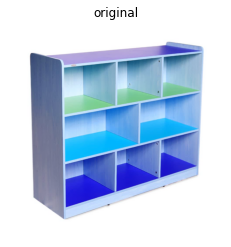

In [46]:
# please provide your code here


img5a = cv.imread('rakBuku.jpg')
img6a = cv.imread('rakBuku.jpg')
plt.imshow(img5a)
plt.axis('off')
plt.title("original")

Text(0.5, 1.0, 'harris corner detection')

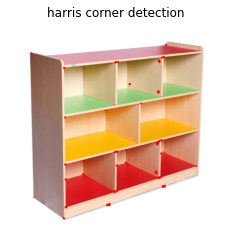

In [47]:
#corner detection
gray = cv.cvtColor(img5a,cv.COLOR_BGR2GRAY)
corners = cv.cornerHarris(gray,11,1,0.06) #0.04-0.06

img5a[corners>0.01*corners.max()]=[0,0,255]
plt.imshow(cv.cvtColor(img5a, cv.COLOR_BGR2RGB))
plt.show
plt.axis('off')
plt.title("harris corner detection")

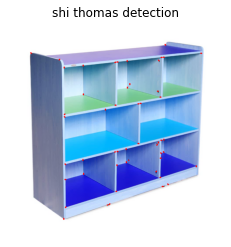

In [49]:
# shi thomas corner detection

gray = cv.cvtColor(img6a,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,50,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img6a,(x,y),3,255,-1)
plt.imshow(img6a)
plt.axis('off')
plt.title("shi thomas detection")
plt.show()
